## AUR Package Exploration

In [1]:
from selenium import webdriver
import re
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import requests
import seaborn as sns
%matplotlib inline

from PIL import Image
import random

import matplotlib.pyplot as plt
import networkx

In [2]:
df = pd.read_csv('../csv/aur_package_data.csv')

First, let's make a word cloud. I'll start with [this example](https://github.com/amueller/word_cloud/blob/master/examples/a_new_hope.py) from a popular python word cloud package. We need an image and a text file, so first we can make a text file where each description of a package is a line in the file: 

In [19]:
with open('package_descriptions.txt', 'a') as file:
    for line in df.Description:
        file.write(line.lower() + " ")

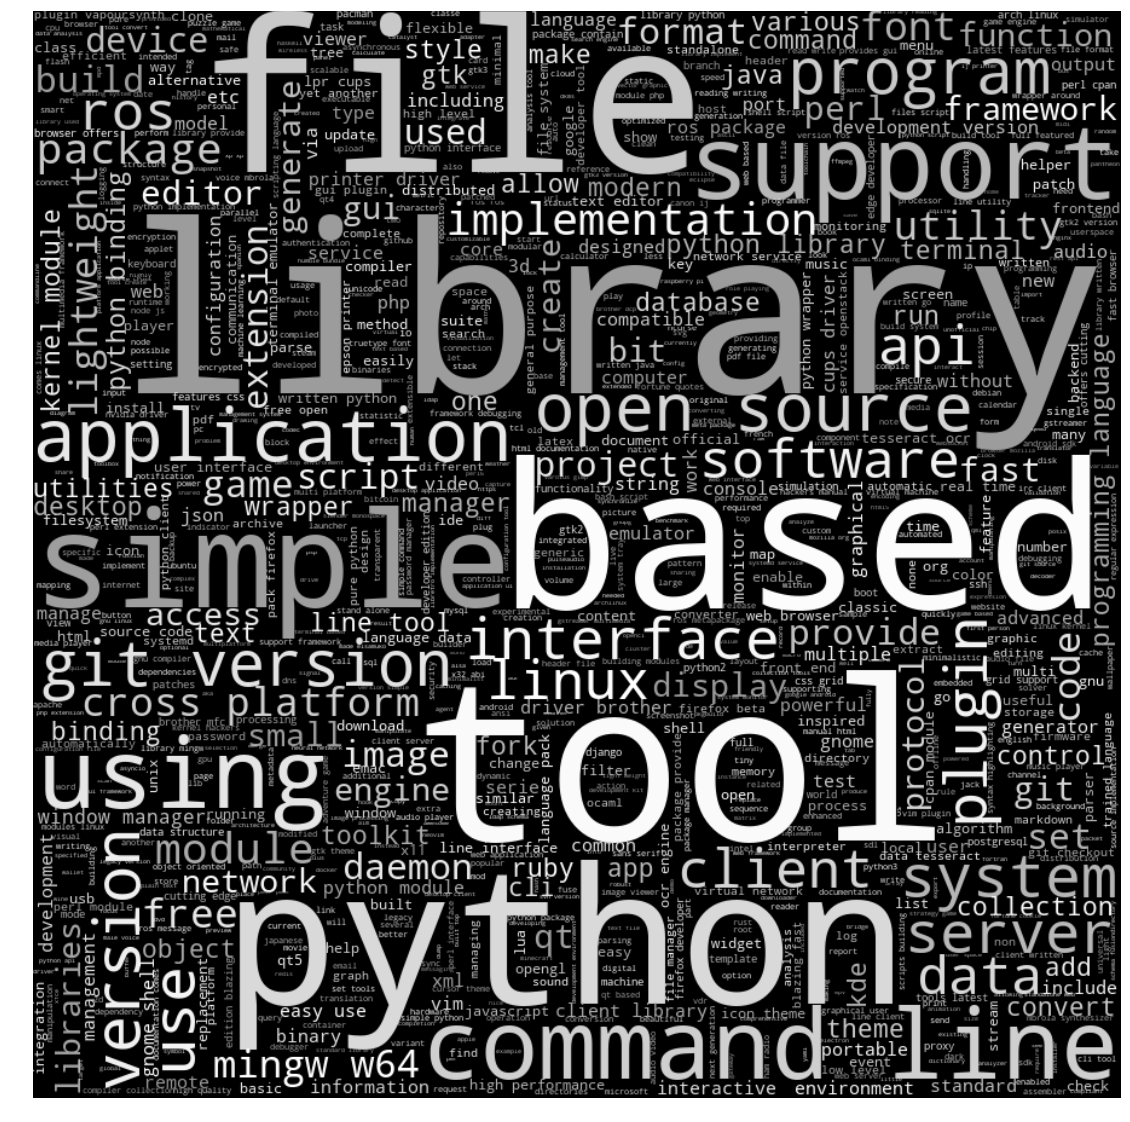

In [25]:
from wordcloud import WordCloud, STOPWORDS

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

mask = np.array(Image.open("/home/brian/Documents/aur/images/arch_logo.png"))

text = open("/home/brian/Documents/aur/ipynb/package_descriptions.txt").read()

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=0,
               random_state=1).generate(text)

default_colors = wc.to_array()
plt.figure(figsize=(20, 20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("arch_word_cloud.png")
plt.axis("off")
plt.savefig("/home/brian/Documents/github/briancaffey.github.io/aur/word_cloud.png")
plt.show()